# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the database
df = pd.read_csv("outputs/exp5_aleatory_linear_circle_10_10_1000/data.csv")
# show the column names
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [18]:
# Fixed the Unnamed colum
# df = df.rename(columns={'Unnamed: 0': 'id_register'})
# df['id_register'] = df['id_register'] + 1

# # remove the last register without the two registers
# df = df.iloc[:-1]

In [19]:
df

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,10,5,4,2,2,19,8,0,0.360034,0.000137,0.000040
1,1,10,5,3,2,2,20,10,0,0.312759,0.000192,0.000056
2,2,10,5,4,2,2,19,17,1,0.283081,0.000136,0.000082
3,2,10,5,3,2,2,20,20,1,0.313952,0.000218,0.000223
4,3,10,5,4,2,2,29,52,1024,0.359114,0.000143,0.017189
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,998,10,5,3,2,2,30,60,1024,0.349849,0.000288,0.087069
1996,999,10,5,4,2,2,49,88,2048,0.536721,0.000275,0.084174
1997,999,10,5,3,2,2,50,100,1024,0.471411,0.000134,0.141171
1998,1000,10,5,4,2,2,19,17,1,0.298511,0.000111,0.000073


## Explore the data from by CBN topology: Linear(4) and Circular(3)

### The mean of the number of local attractors

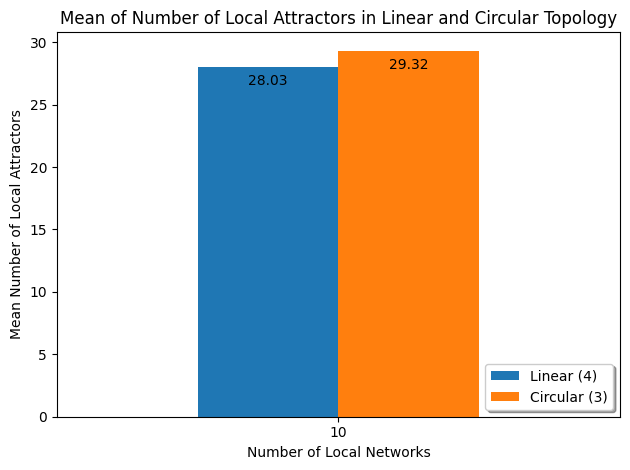

In [20]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_local_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Local Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Local Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


### The mean of the number of attractor pairs

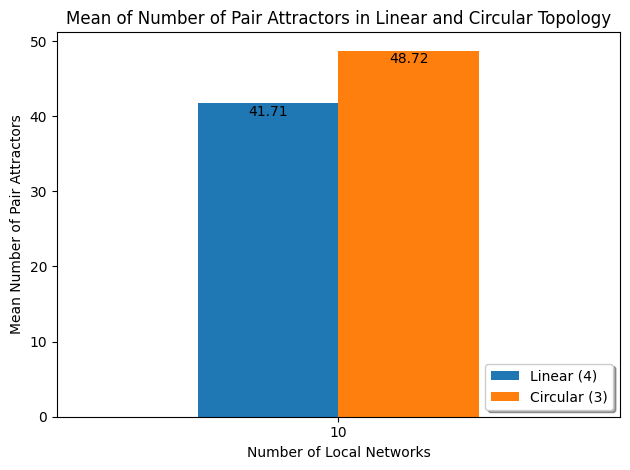

In [21]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_pair_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Pair Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Pair Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()

### The mean of the number of attractor fields

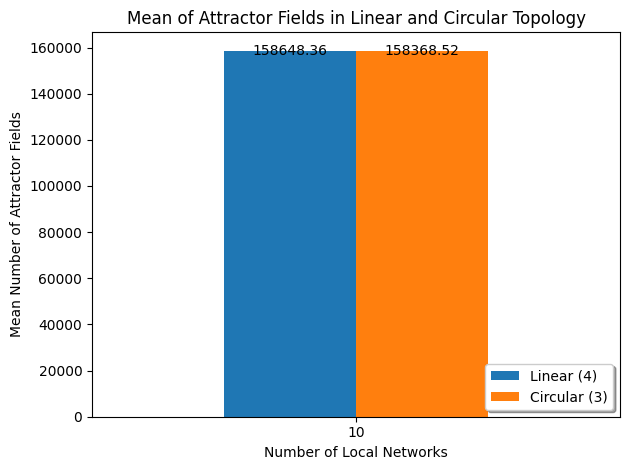

In [22]:
import matplotlib.pyplot as plt

# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_attractor_fields'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Attractor Fields')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Attractor Fields in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


## Individual Analysis by number of local networks

### Violin Graphs

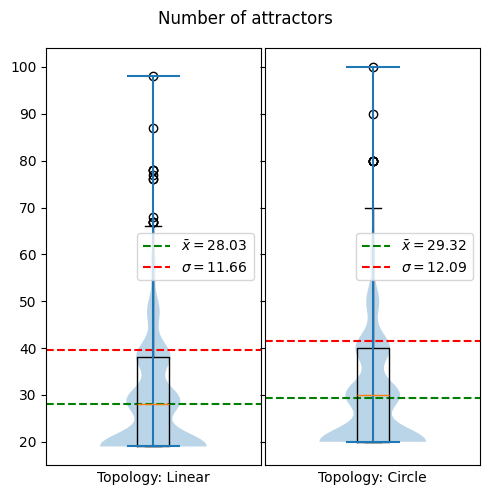

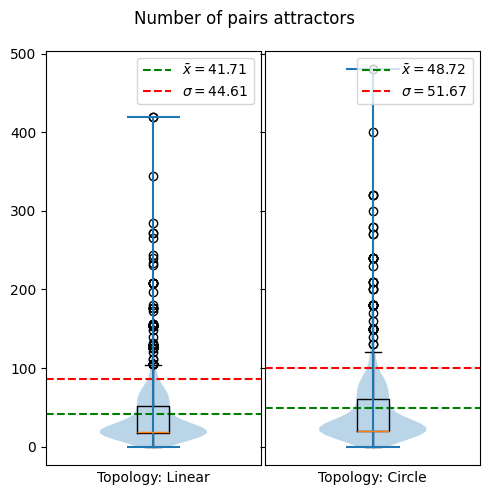

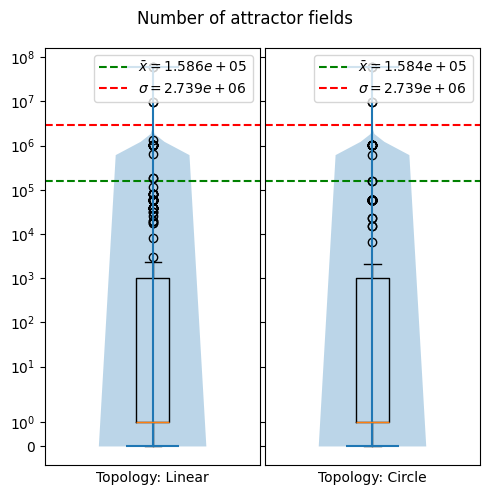

In [23]:
# Filter the graphs
# df_local_networks_n = df[df['n_local_networks'] == 9]
df_local_networks_n = df
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


### Top 20 Analysis

In [24]:
# filter by topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Select the 20 best df_v4 and df_v3 values for each metric
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')


In [25]:
top_20_v4_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
1858,930,60466176
1992,997,60466176
570,286,9765625
848,425,9765625
718,360,1310720
160,81,1048576
472,237,1048576
588,295,1048576
732,367,1048576
830,416,1048576


In [26]:
top_20_v3_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
1859,930,60466176
1993,997,60466176
571,286,9765625
849,425,9765625
161,81,1048576
473,237,1048576
589,295,1048576
719,360,1048576
733,367,1048576
831,416,1048576


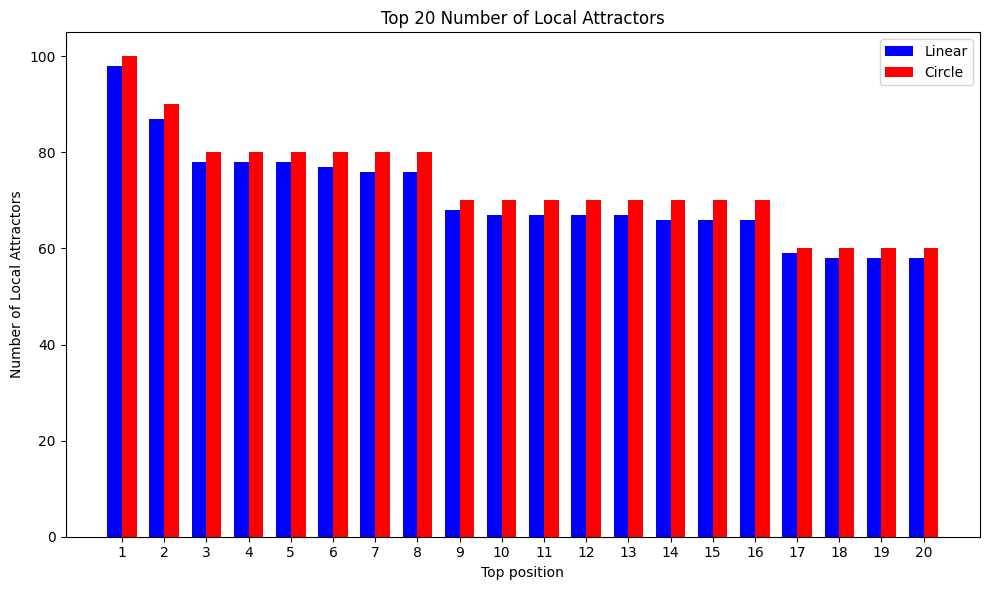

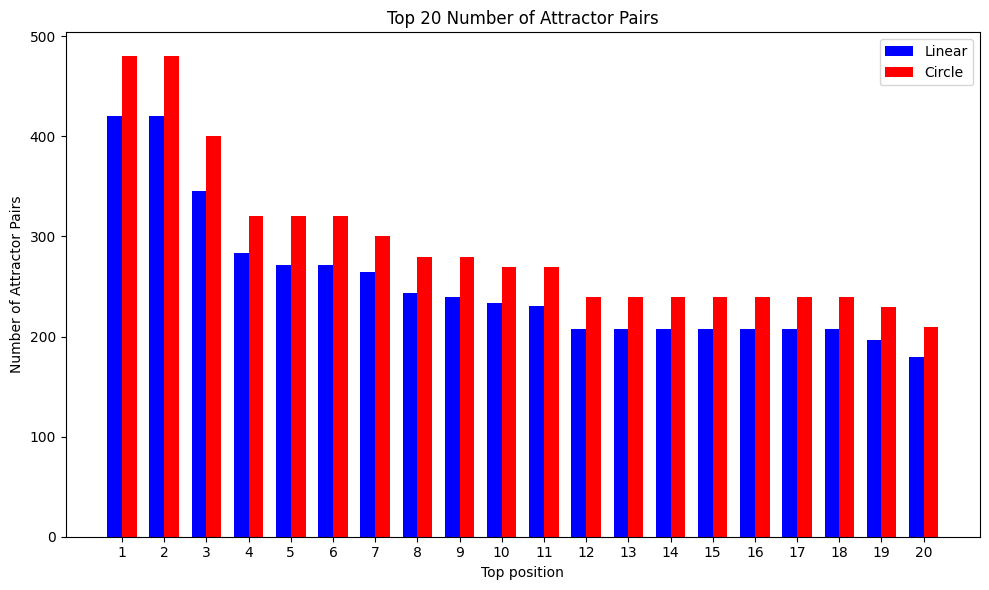

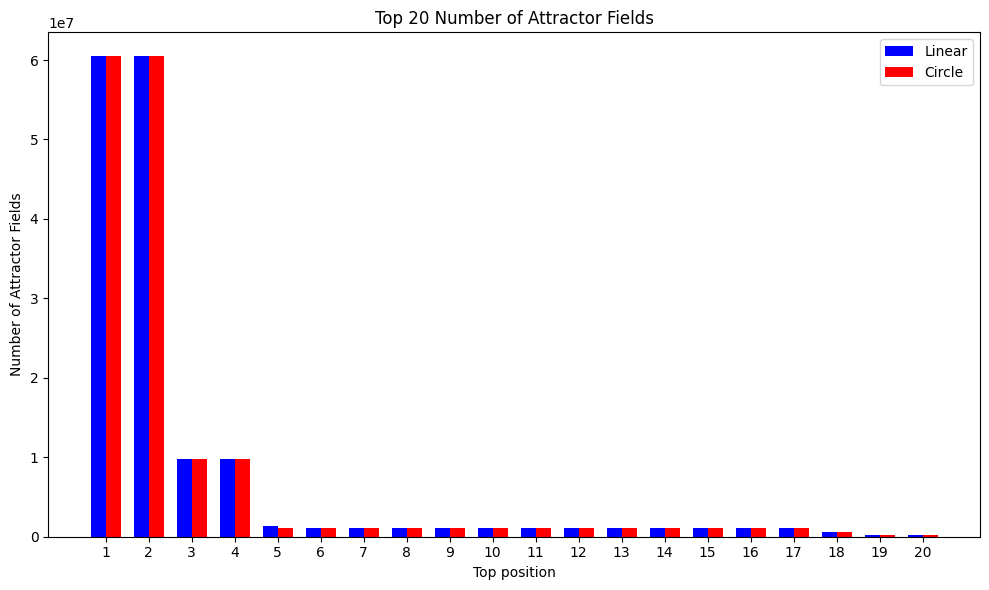

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Function to graph a specific metric
def plot_metric(df_linear, df_circle, metric, label_y, title):
    # Ordenar los DataFrames por la métrica (de mayor a menor)
    df_linear_sorted = df_linear.sort_values(metric, ascending=False)
    df_circle_sorted = df_circle.sort_values(metric, ascending=False)

    positions = np.arange(1, 21) 
    width = 0.35

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for Linear
    ax.bar(positions - width/2, df_linear_sorted[metric], width, label='Linear', color='blue')
    # Create bars for Circle
    ax.bar(positions + width/2, df_circle_sorted[metric], width, label='Circle', color='red')

    ax.set_title(f'Top 20 {title}')
    ax.set_ylabel(f'Number of {label_y}')  # Label on y axis
    ax.set_xlabel('Top position')  # Label on x axis
    ax.set_xticks(positions)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Graph for 'n_local_attractors
plot_metric(top_20_v4_attractors, top_20_v3_attractors, 'n_local_attractors', "Local Attractors", 'Number of Local Attractors')

# Chart for 'n_pair_attractors
plot_metric(top_20_v4_pairs, top_20_v3_pairs, 'n_pair_attractors', "Attractor Pairs", 'Number of Attractor Pairs')

# Graph for 'n_attractor_fields
plot_metric(top_20_v4_fields, top_20_v3_fields, 'n_attractor_fields', 'Attractor Fields', 'Number of Attractor Fields')


In [28]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

,linear_local_attractors,circle_local_attractors,linear_attractors_pairs,circle_attractors_pairs,linear_attractors_fields,circle_attractors_fields
count,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,28.03200,29.320000,41.710000,48.720000,1.586484e+05,1.583685e+05
std,11.66289,12.094787,44.607328,51.672349,2.738787e+06,2.738680e+06
min,19.00000,20.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,19.00000,20.000000,17.000000,20.000000,1.000000e+00,1.000000e+00
50%,28.00000,30.000000,18.000000,20.000000,1.000000e+00,1.000000e+00
75%,38.00000,40.000000,52.000000,60.000000,1.024000e+03,1.024000e+03
max,98.00000,100.000000,420.000000,480.000000,6.046618e+07,6.046618e+07


In [29]:
# Calculate the difference between circle_attractors_fields and linear_attractors_fields
df_resume['difference'] = df_resume['circle_attractors_fields'] - df_resume['linear_attractors_fields']

# Filter cases where circle_attractors_fields is greater than linear_attractors_fields
df_superior = df_resume[df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']]

# Calculate the mean of the difference
mean_difference1 = (df_superior['circle_attractors_fields'] - df_superior['linear_attractors_fields']).mean()
mean_difference2 = (df_superior['linear_attractors_fields'] - df_superior['circle_attractors_fields']).mean()

# Print the result
print(f'Mean of the difference where the number of attractor fields Circle is greater than Linear: {mean_difference1}')

# Count the number of times circle_attractors_fields is greater, equal, and less than linear_attractors_fields
count_greater = (df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']).sum()
count_equal = (df_resume['circle_attractors_fields'] == df_resume['linear_attractors_fields']).sum()
count_less = (df_resume['circle_attractors_fields'] < df_resume['linear_attractors_fields']).sum()

# Print the results
print(f'Number of times circle_attractors_fields is greater than linear_attractors_fields: {count_greater}')
print(f'Number of times circle_attractors_fields is equal to linear_attractors_fields: {count_equal}')
print(f'Number of times circle_attractors_fields is less than linear_attractors_fields: {count_less}')


Mean of the difference where the number of attractor fields Circle is greater than Linear: 4304.392405063291
Number of times circle_attractors_fields is greater than linear_attractors_fields: 79
Number of times circle_attractors_fields is equal to linear_attractors_fields: 707
Number of times circle_attractors_fields is less than linear_attractors_fields: 214


# Grafo de Disperção

In [30]:
df_topology_4.keys()

Index(['n_var_network', 'v_topology', 'n_output_variables',
       'n_clauses_function', 'n_local_attractors', 'n_pair_attractors',
       'n_attractor_fields', 'n_time_find_attractors', 'n_time_find_pairs',
       'n_time_find_fields'],
      dtype='object')

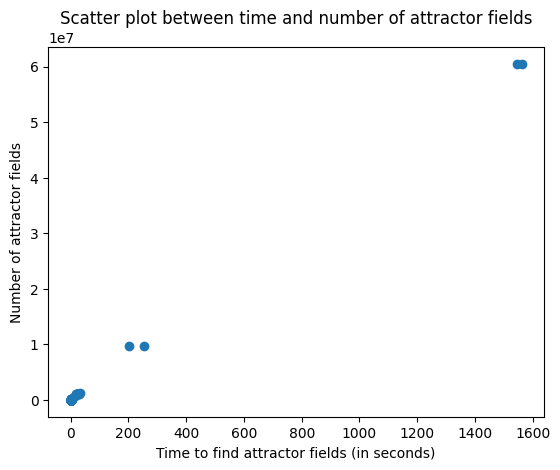

In [31]:
# Create a scatter plot
plt.scatter(df_topology_4['n_time_find_fields'], df_topology_4['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

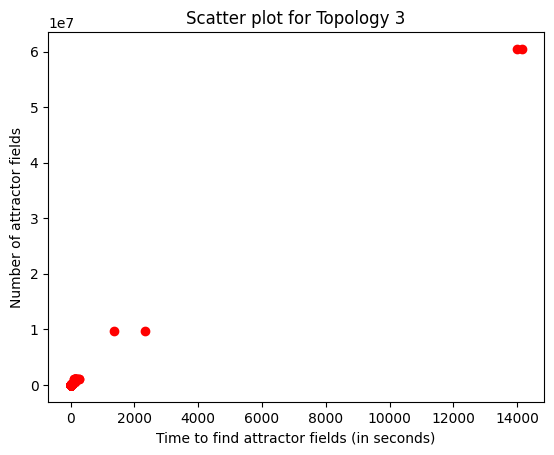

In [32]:
# Create a scatter plot for df_topology_3
plt.scatter(df_topology_3['n_time_find_fields'], df_topology_3['n_attractor_fields'], color='red', label='Topology 3')

plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot for Topology 3')
plt.show()